In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
X_train_val,X_test,y_train_val,y_test = train_test_split(df[iris.feature_names], df['target'], test_size = 0.2, random_state = 42)

Model Fitting Using cross_val_score 

In [4]:
value_c_cross = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
acc_cross = []
times = []
for i in value_c_cross:
    clf_cross = SVC(kernel = 'linear', random_state = 42, C =i)
    t0 = time.process_time()
    scores = cross_val_score(clf_cross,X_train_val,y_train_val, cv =10)
    t1 = time.process_time()
    acc_cross.append(scores.mean())
    times.append(t1 - t0)

In [5]:
for c, acc,t in zip(value_c_cross, acc_cross, times):
    print("For %r Value of C, Accuracy is %0.3f in %0.4f seconds" %(c,acc,t))

For 0.1 Value of C, Accuracy is 0.958 in 0.0312 seconds
For 0.5 Value of C, Accuracy is 0.967 in 0.0156 seconds
For 1 Value of C, Accuracy is 0.967 in 0.0312 seconds
For 2 Value of C, Accuracy is 0.967 in 0.0156 seconds
For 5 Value of C, Accuracy is 0.967 in 0.0312 seconds
For 10 Value of C, Accuracy is 0.967 in 0.0156 seconds
For 20 Value of C, Accuracy is 0.942 in 0.0312 seconds
For 50 Value of C, Accuracy is 0.934 in 0.0156 seconds


Text(0, 0.5, 'Cross Validation Score Mean Test Accuracy(%)')

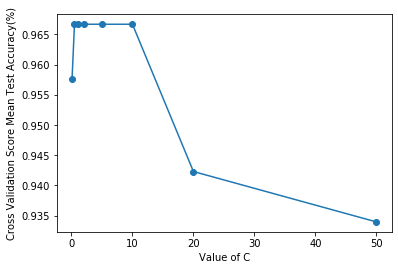

In [6]:
%matplotlib inline
plt.plot(value_c_cross,acc_cross,"-o")
plt.xlabel('Value of C')
plt.ylabel('Cross Validation Score Mean Test Accuracy(%)')

In [7]:
clf_test = SVC(kernel = 'linear', C = 0.1, random_state = 42)
clf_test.fit(X_train_val, y_train_val)
y_pred_test = clf_test.predict(X_test)
accuracy_test = accuracy_score(y_pred_test, y_test)*100
accuracy_test

100.0